In [2]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Circle Dataset

In [3]:
rs = 0
X_circle, y_circle = make_circles(300, noise=0.1, random_state=rs)
trX_circle, teX_circle, trY_circle, teY_circle = train_test_split(X_circle, y_circle, test_size=0.2, random_state=rs)

### Classification Dataset

In [4]:
rs = 0
X, y = make_classification(300, random_state=rs)
trX, teX, trY, teY = train_test_split(X, y, test_size=0.2, random_state=rs)

### Plotting

In [5]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = teX_circle[:, 0].min() - 1, teX_circle[:, 0].max() + 1
    y_min, y_max = teX_circle[:, 1].min() - 1, teX_circle[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(teX_circle[:, 0], teX_circle[:, 1], c=teY_circle, cmap=plt.cm.Spectral)

# Decision Tree

## Question 4

Accuracy:  66.66666666666666


Text(0.5, 1.0, 'Decision Tree With GINI')

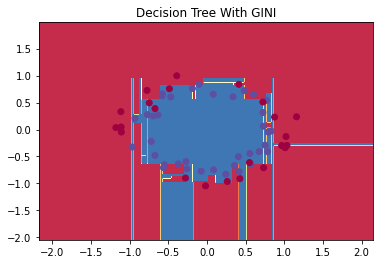

In [6]:
clf_gini = DecisionTreeClassifier(criterion='gini' ,random_state = 0) 
clf_gini.fit(trX_circle, trY_circle)
yPred_gini = clf_gini.predict(teX_circle)
print("Accuracy: ", accuracy_score(teY_circle, yPred_gini) * 100)
plot_decision_boundary(lambda teX_circle: clf_gini.predict(teX_circle))
plt.title("Decision Tree With GINI")

Accuracy:  75.0


Text(0.5, 1.0, 'Decision Tree with Entropy')

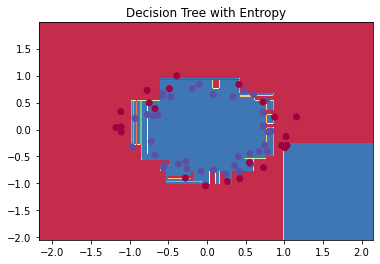

In [7]:
clf_ent = DecisionTreeClassifier(criterion='entropy', random_state = 0) 
clf_ent.fit(trX_circle, trY_circle)
yPred_ent = clf_ent.predict(teX_circle)
print("Accuracy: ", accuracy_score(teY_circle, yPred_ent) * 100)
plot_decision_boundary(lambda teX_circle: clf_ent.predict(teX_circle))
plt.title("Decision Tree with Entropy")

## Question 5

<Figure size 432x288 with 0 Axes>

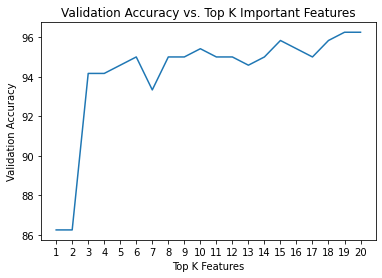

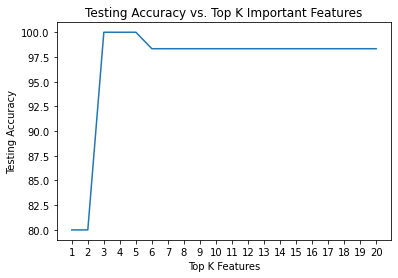

<Figure size 432x288 with 0 Axes>

In [39]:
clf = DecisionTreeClassifier(criterion='entropy', random_state = 0) 
clf.fit(trX, trY)
important_features = clf.feature_importances_
important_features = np.argsort(important_features)[::-1]

validation_accuracies = []
test_accuracies = []
topK_features = []

clf.fit(trX[:, important_features[0]].reshape(-1,1), trY)
yPred = clf.predict(teX[:, important_features[0]].reshape(-1,1))
test_accuracies.append(accuracy_score(teY, yPred) * 100)

scores = cross_val_score(clf, trX[:, important_features[0]].reshape(-1,1), trY, cv=4)
validation_accuracies.append(scores.mean()*100)
topK_features.append(1)
for ft in range(1, len(important_features)):
  clf.fit(trX[:, important_features[:ft]], trY)
  yPred = clf.predict(teX[:, important_features[:ft]])
  test_accuracies.append(accuracy_score(teY, yPred) * 100)

  scores = cross_val_score(clf, trX[:, important_features[:ft]], trY, cv=4)
  validation_accuracies.append(scores.mean()*100)
  topK_features.append(ft+1)

plt.plot(topK_features, validation_accuracies)
plt.xticks(np.arange(min(topK_features), max(topK_features)+1, 1.0))
plt.title("Validation Accuracy vs. Top K Important Features")
plt.xlabel("Top K Features")
plt.ylabel("Validation Accuracy")
plt.figure()

plt.plot(topK_features, test_accuracies)
plt.xticks(np.arange(min(topK_features), max(topK_features)+1, 1.0))
plt.title("Testing Accuracy vs. Top K Important Features")
plt.xlabel("Top K Features")
plt.ylabel("Testing Accuracy")
plt.figure()

# Bagging

## Question 6

Accuracy:  60.0
Accuracy:  75.0
Accuracy:  71.667
Accuracy:  75.0


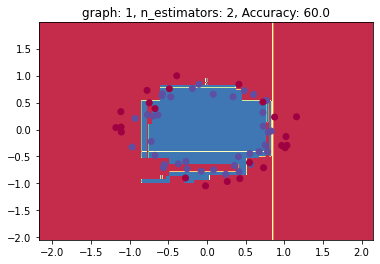

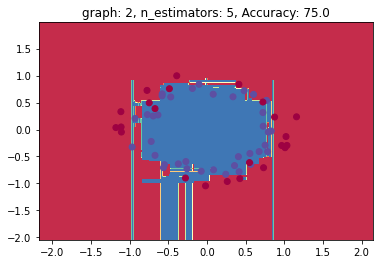

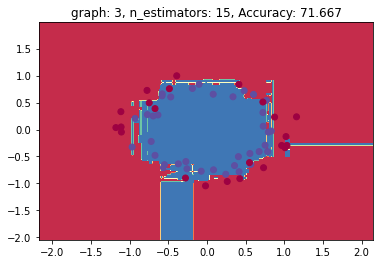

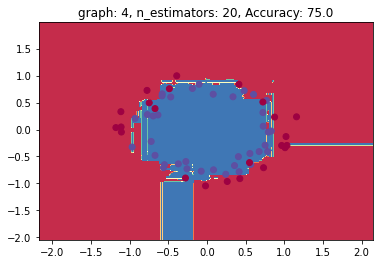

<Figure size 432x288 with 0 Axes>

In [43]:
dt = DecisionTreeClassifier(random_state=0)
nEst = [2,5,15,20]
count = 1
for est in nEst:
  bagging = BaggingClassifier(clone(dt), n_estimators=est, n_jobs=-1, random_state=0)
  bagging.fit(trX_circle, trY_circle)
  yPred_bagging = bagging.predict(teX_circle)
  bagging_acc = round(accuracy_score(teY_circle, yPred_bagging) *100, 3)
  print("Accuracy: ", bagging_acc)
  plot_decision_boundary(lambda teX_circle: bagging.predict(teX_circle))
  plt.title("graph: {}, n_estimators: {}, Accuracy: {}".format(count, est , bagging_acc))
  plt.figure()
  count = count +1

# Random Forest

 ## Question 8


Accuracy: 51.66666666666667
Accuracy: 66.66666666666666
Accuracy: 66.66666666666666
Accuracy: 78.33333333333333


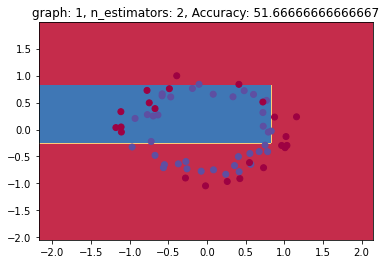

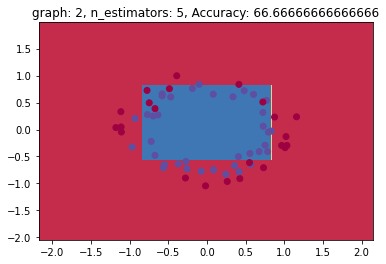

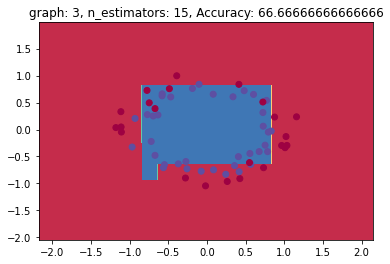

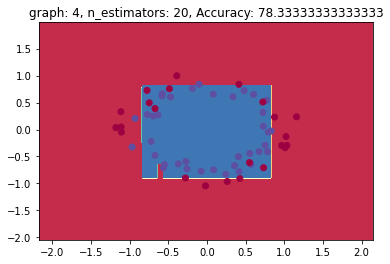

In [41]:
n_estimators = [2, 5, 15, 20]
count = 1
for i in n_estimators:
  randem_model = RandomForestClassifier(n_estimators = i , max_depth=2, random_state=0)
  randem_model.fit(trX_circle, trY_circle)
  model_pred = randem_model.predict(teX_circle)
  randem_acc =  accuracy_score(teY_circle, model_pred) * 100
  print("Accuracy:", accuracy_score(teY_circle, model_pred) * 100)
  plt.subplots(sharex='col', sharey='row')
  plot_decision_boundary(lambda trX_circle: randem_model.predict(trX_circle))
  plt.title("graph: {}, n_estimators: {}, Accuracy: {}".format(count, i , randem_acc))
  count = count +1

# Boosting

## Question 10

Accuracy: 66.667
Accuracy: 65.0
Accuracy: 66.667
Accuracy: 65.0
Accuracy: 83.333
Accuracy: 61.667
Accuracy: 73.333
Accuracy: 80.0
Accuracy: 56.667
Accuracy: 80.0
Accuracy: 78.333
Accuracy: 61.667


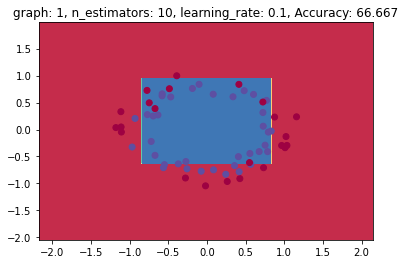

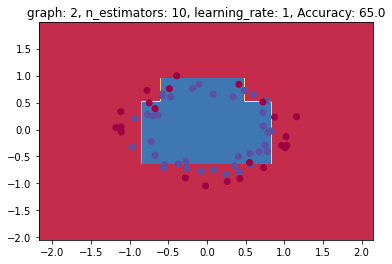

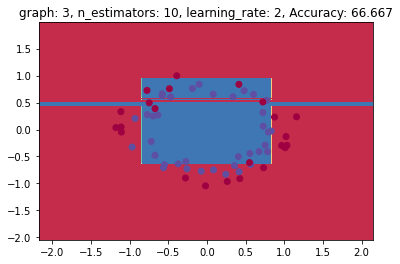

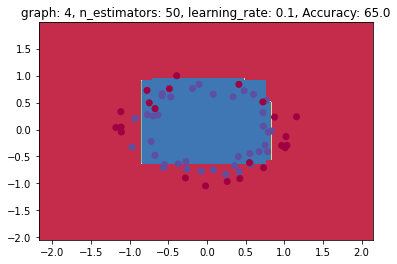

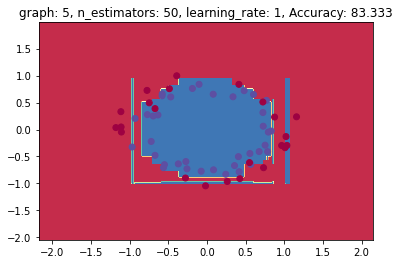

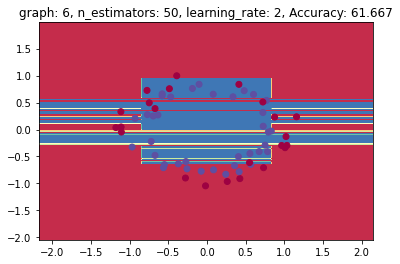

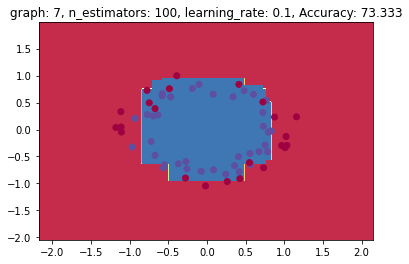

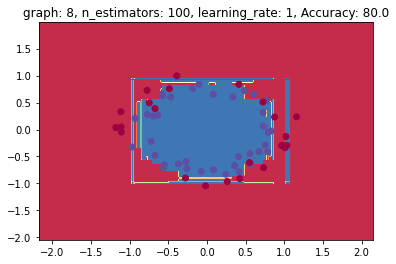

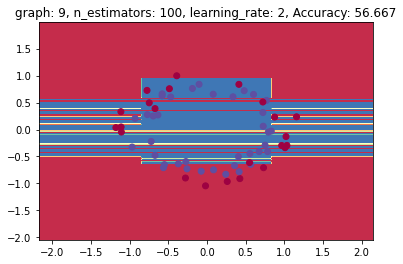

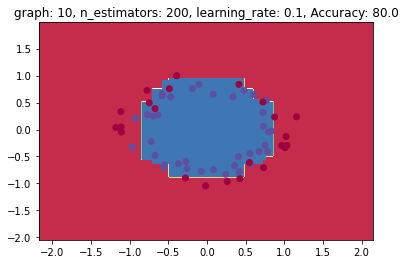

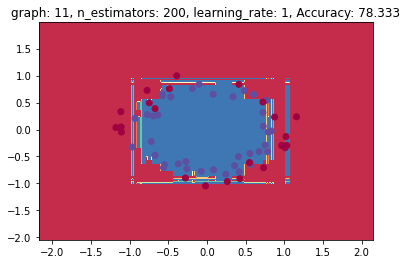

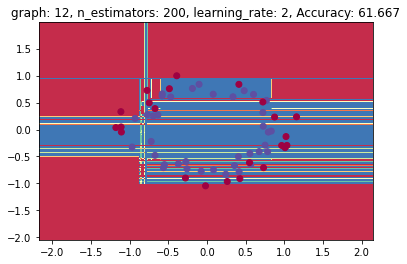

In [44]:
n_estimators_boosting = [10, 50, 100, 200]
learning_rate_boosting = [0.1, 1, 2]
count = 1
for i in n_estimators_boosting:
  for j in learning_rate_boosting:
    boost_model = AdaBoostClassifier(n_estimators=i, learning_rate=j, random_state=0)
    boost_model.fit(trX_circle, trY_circle)
    boost_pred = boost_model.predict(teX_circle)
    acc_boost = round(accuracy_score(teY_circle, boost_pred) * 100, 3)
    print("Accuracy:",acc_boost)
    plt.subplots(sharex='col', sharey='row')
    plot_decision_boundary(lambda trX_circle: boost_model.predict(trX_circle))
    plt.title("graph: {}, n_estimators: {}, learning_rate: {}, Accuracy: {}".format(count, i, j, acc_boost))
    count = count + 1   

# Stacking

## Question 11

Accuracy: 83.333
Accuracy: 73.333
Accuracy: 50.0


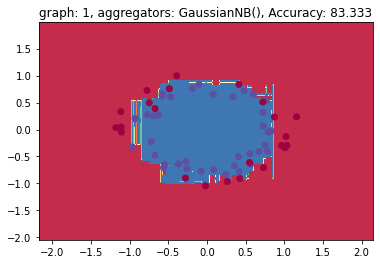

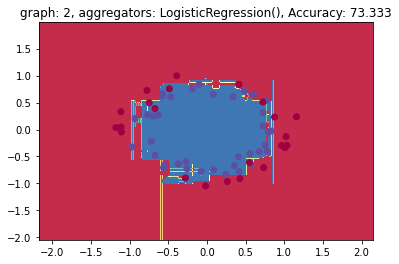

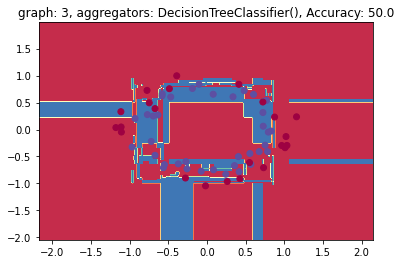

In [45]:
estimators = [('ent_clf' , DecisionTreeClassifier(criterion='entropy', random_state = 0)) , 
              ('bagging_clf' , BaggingClassifier(clone(dt), n_estimators=5, n_jobs=-1, random_state=0)),
              ('randem_clf' , RandomForestClassifier(n_estimators = 20 , max_depth=2, random_state=0)),
              ('boost_clf' , AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0))
              ]
aggregators = [GaussianNB() , LogisticRegression() , DecisionTreeClassifier()]
count = 1
for agg in aggregators: 
  clf_stacking = StackingClassifier( estimators=estimators, final_estimator=agg)
  clf_stacking.fit(trX_circle, trY_circle)
  stacking_pred = clf_stacking.predict(teX_circle)
  acc_stacking = round(accuracy_score(teY_circle, stacking_pred) * 100, 3)
  print("Accuracy:",acc_stacking)
  plt.subplots(sharex='col', sharey='row')
  plot_decision_boundary(lambda teX_circle: clf_stacking.predict(teX_circle))
  plt.title("graph: {}, aggregators: {}, Accuracy: {}".format(count, agg , acc_stacking))
  count = count + 1